<a href="https://colab.research.google.com/github/kirmanioussema12/Deep-Learning/blob/main/batiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

In [14]:
file_path = './sample_data/metadata.csv'
metadata_df = pd.read_csv(file_path)

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [29]:
import shutil
import os

# Define the paths to your folders in Google Drive and the target path in Colab
drive_path = '/content/drive/MyDrive/'
colab_sample_data_path = '/content/sample_data/'

# List of folder names you want to move
folders_to_move = ['testA']

# Move each folder from Google Drive to sample_data folder in Colab
for folder in folders_to_move:
    src = os.path.join(drive_path, folder)
    dest = os.path.join(colab_sample_data_path, folder)
    # Copy folder to sample_data in Colab
    shutil.copytree(src, dest)

print("Folders successfully moved to sample_data!")


Folders successfully moved to sample_data!


In [30]:
metadata_df.head(40)

,image_id,domain,split,image_path
0,1,B (Facade Segmentation),test,testB/1.jpg
1,1,B (Facade Segmentation),test,testB/1.jpg
2,10,B (Facade Segmentation),test,testB/10.jpg
3,10,B (Facade Segmentation),test,testB/10.jpg
4,100,B (Facade Segmentation),test,testB/100.jpg
5,100,B (Facade Segmentation),test,testB/100.jpg
6,100_A,A (Facade Photo),train,trainA/100_A.jpg
7,100_B,A (Facade Photo),train,trainA/100_B.jpg
8,101,B (Facade Segmentation),test,testB/101.jpg
9,101,B (Facade Segmentation),test,testB/101.jpg


In [45]:
# Extraire les chemins des images et filtrer par split
train_images = metadata_df[metadata_df['split'] == 'train']['image_path'].tolist()
test_images = metadata_df[metadata_df['split'] == 'test']['image_path'].tolist()
all_images = metadata_df['image_path'].tolist()

In [46]:
# Diviser les données en train (80%) et test (20%)
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)
print(f"Nombre d'images d'entraînement : {len(train_images)}")
print(f"Nombre d'images de test : {len(test_images)}")

Nombre d'images d'entraînement : 809
Nombre d'images de test : 203


In [47]:
# Chemin racine des images (situées sous `sample_data`)
root_path = "./sample_data/"  # Base où se trouvent vos dossiers d'images
train_image_paths = [os.path.join(root_path, img_path) for img_path in train_images]
test_image_paths = [os.path.join(root_path, img_path) for img_path in test_images]

In [48]:
# Fonction de prétraitement des images : redimensionnement
def preprocess_images(image_paths, size=(128, 128)):
    processed_images = []
    for img_path in tqdm(image_paths, desc="Prétraitement des images"):
        try:
            # Vérifier l'extension du fichier
            if not img_path.endswith('.jpg'):
                img_path += '.jpg'

            print(f"Traitement de l'image: {img_path}")

            # Charger l'image
            img = Image.open(img_path)

            # Afficher le format de l'image pour débogage
            print(f"Format de l'image: {img.format}")

            # Redimensionner l'image
            img = img.resize(size)
            processed_images.append(img)

        except Exception as e:
            print(f"Erreur lors du traitement de {img_path}: {e}")
    return processed_images



In [49]:
# Prétraiter les images d'entraînement et de test
train_processed = preprocess_images(train_image_paths)
test_processed = preprocess_images(test_image_paths)

Prétraitement des images:   3%|▎         | 26/809 [00:00<00:03, 254.09it/s]

Traitement de l'image: ./sample_data/trainA/68_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/76_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/58.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/360_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/213_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/161_B.jpg
Erreur lors du traitement de ./sample_data/trainA/161_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/161_B.jpg'
Traitement de l'image: ./sample_data/trainB/326_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/61.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/286_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/12.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/151_B.jpg
Erreur lors du traitement de ./sample_data/trainA/151_B.jpg: [Errno 2] No

Prétraitement des images:  10%|▉         | 79/809 [00:00<00:02, 247.04it/s]

Traitement de l'image: ./sample_data/trainA/239_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/246_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/26.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/309_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/22.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/57.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/209_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/100.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/261_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/36_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/133_B.jpg
Erreur lors du traitement de ./sample_data/trainA/133_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/133_B.jpg'
Traitement de l'image: ./sample_data/trainB/219_B.j

Prétraitement des images:  17%|█▋        | 134/809 [00:00<00:02, 254.76it/s]

Traitement de l'image: ./sample_data/trainA/329_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/334_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/333_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/84_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/53_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/268_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/313_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/335_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/389_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/82.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/5_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/189_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/24.jpg
Format de l'image: JPE

Prétraitement des images:  23%|██▎       | 189/809 [00:00<00:02, 264.33it/s]


Traitement de l'image: ./sample_data/trainA/270_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/228_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/153_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/27.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/335_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/8_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/14_B.jpg
Erreur lors du traitement de ./sample_data/trainA/14_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/14_B.jpg'
Traitement de l'image: ./sample_data/testB/94.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/161_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/106.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/327_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/173_B.

Prétraitement des images:  30%|██▉       | 242/809 [00:00<00:02, 242.70it/s]

Traitement de l'image: ./sample_data/trainA/232_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/114_B.jpg
Erreur lors du traitement de ./sample_data/trainA/114_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/114_B.jpg'
Traitement de l'image: ./sample_data/trainB/250_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/88_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/81.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/399_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/201_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/316_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/74_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/59_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/89.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/30

Prétraitement des images:  36%|███▌      | 291/809 [00:01<00:02, 235.15it/s]

Traitement de l'image: ./sample_data/trainA/160_B.jpg
Erreur lors du traitement de ./sample_data/trainA/160_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/160_B.jpg'
Traitement de l'image: ./sample_data/trainA/197_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/62.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/73.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/371_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/248_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/263_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/124_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/14.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/33.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/88.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/254_A.jpg
F

Prétraitement des images:  42%|████▏     | 343/809 [00:01<00:01, 241.61it/s]


Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/368_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/167_B.jpg
Erreur lors du traitement de ./sample_data/trainA/167_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/167_B.jpg'
Traitement de l'image: ./sample_data/trainB/256_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/375_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/52.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/90_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/379_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/349_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/1_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/230_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/102_B.jpg
Erreur lors du traitement de ./sample_dat

Prétraitement des images:  49%|████▊     | 394/809 [00:01<00:01, 244.09it/s]

Traitement de l'image: ./sample_data/trainA/141_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/289_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/75_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/117_B.jpg
Erreur lors du traitement de ./sample_data/trainA/117_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/117_B.jpg'
Traitement de l'image: ./sample_data/trainA/374_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/7_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/245_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/203_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/112_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/237_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/174_B.jpg
Erreur lors du traitement de ./sample_data/trainA/174_B.jpg: [

Prétraitement des images:  56%|█████▌    | 449/809 [00:01<00:01, 257.28it/s]


Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/40_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/103.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/146_B.jpg
Erreur lors du traitement de ./sample_data/trainA/146_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/146_B.jpg'
Traitement de l'image: ./sample_data/trainA/226_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/19_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/367_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/91_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/172_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/140_B.jpg
Erreur lors du traitement de ./sample_data/trainA/140_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/140_B.jpg'
Traitement de l'image: ./sample_data/trainA/372_A.jpg
Format de l

Prétraitement des images:  62%|██████▏   | 503/809 [00:02<00:01, 248.97it/s]

Traitement de l'image: ./sample_data/testB/69.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/3.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/92_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/86.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/330_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/92_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/160_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/388_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/157_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/377_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/385_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/43_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/13_B.jpg
Erreur lors du traitement d

Prétraitement des images:  69%|██████▊   | 556/809 [00:02<00:00, 253.01it/s]

Traitement de l'image: ./sample_data/testB/52.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/357_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/74.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/31_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/51_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/295_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/386_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/154_B.jpg
Erreur lors du traitement de ./sample_data/trainA/154_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/154_B.jpg'
Traitement de l'image: ./sample_data/trainA/154_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/39_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/83_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/57.j

Prétraitement des images:  72%|███████▏  | 582/809 [00:02<00:00, 238.46it/s]

Traitement de l'image: ./sample_data/testB/35.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/62_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/94_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/252_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/93_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/301_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/202_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/58_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/275_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/299_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/14.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/378_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/19.jpg
Format de l'image: JPEG
Tr

Prétraitement des images:  78%|███████▊  | 633/809 [00:02<00:00, 241.52it/s]

Traitement de l'image: ./sample_data/testB/78.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/348_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/66_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/54_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/359_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/70_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/321_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/9.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/33.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/50.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/129_B.jpg
Erreur lors du traitement de ./sample_data/trainA/129_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/129_B.jpg'
Traitement de l'image: ./sample_data/trainA/194_A.jpg
F

Prétraitement des images:  84%|████████▍ | 682/809 [00:02<00:00, 232.94it/s]

Traitement de l'image: ./sample_data/trainA/134_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/52_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/392_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/329_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/260_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/3.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/112_B.jpg
Erreur lors du traitement de ./sample_data/trainA/112_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/112_B.jpg'
Traitement de l'image: ./sample_data/trainA/107_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/47.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/60.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/177_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/14_A.

Prétraitement des images:  92%|█████████▏| 745/809 [00:02<00:00, 275.40it/s]

Traitement de l'image: ./sample_data/trainA/391_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/214_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/381_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/198_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/392_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/283_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/280_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/99_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/55.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/66.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/203_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/177_B.jpg
Erreur lors du traitement de ./sample_data/trainA/177_B.jpg: [Errno 2] No such file or directory:

Prétraitement des images: 100%|██████████| 809/809 [00:03<00:00, 254.32it/s]


Traitement de l'image: ./sample_data/trainA/302_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/118_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/28_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/323_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/64_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/4.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/199_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/104.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/221_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/282_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/16.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/207_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/87.jpg
Format de l'image: JPEG
Trai

Prétraitement des images:   0%|          | 0/203 [00:00<?, ?it/s]

Traitement de l'image: ./sample_data/trainB/352_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/354_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/89.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/35.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/243_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/39.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/400_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/311_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/306_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/122_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/84_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/273_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/88.jpg
Format de l'image: JPEG
Tra

Prétraitement des images:  14%|█▍        | 29/203 [00:00<00:00, 281.79it/s]

Traitement de l'image: ./sample_data/trainA/135_B.jpg
Erreur lors du traitement de ./sample_data/trainA/135_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/135_B.jpg'
Traitement de l'image: ./sample_data/trainB/201_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/394_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/181_B.jpg
Erreur lors du traitement de ./sample_data/trainA/181_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/181_B.jpg'
Traitement de l'image: ./sample_data/trainA/341_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/339_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/19_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/59.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/211_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/320_A.jpg
Format de l'image: JPEG
Traitement 

Prétraitement des images:  30%|██▉       | 60/203 [00:00<00:00, 295.30it/s]

Traitement de l'image: ./sample_data/trainA/236_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/271_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/101_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/377_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/195_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/222_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/279_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/176_B.jpg
Erreur lors du traitement de ./sample_data/trainA/176_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/176_B.jpg'
Traitement de l'image: ./sample_data/trainB/336_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/190_B.jpg
Erreur lors du traitement de ./sample_data/trainA/190_B.jpg: [Errno 2] No such file or directory: './sample_data/trainA/190_B.jpg'
Traite

Prétraitement des images:  65%|██████▌   | 132/203 [00:00<00:00, 337.27it/s]

Traitement de l'image: ./sample_data/testB/70.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/216_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/306_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/23.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/79_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/90_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/82.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/67_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/8.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/17.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/305_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/13.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/11_B.jpg
Erreur lors du traitement de ./sample_d

Prétraitement des images:  99%|█████████▊| 200/203 [00:00<00:00, 332.37it/s]

Traitement de l'image: ./sample_data/trainA/119_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/253_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/290_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/340_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/27_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/57_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainB/249_B.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/85.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/355_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/38.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/testB/95.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/50_A.jpg
Format de l'image: JPEG
Traitement de l'image: ./sample_data/trainA/319_A.jpg
Format de l'image: JPEG
T

Prétraitement des images: 100%|██████████| 203/203 [00:00<00:00, 324.95it/s]

Traitement de l'image: ./sample_data/testB/106.jpg
Format de l'image: JPEG


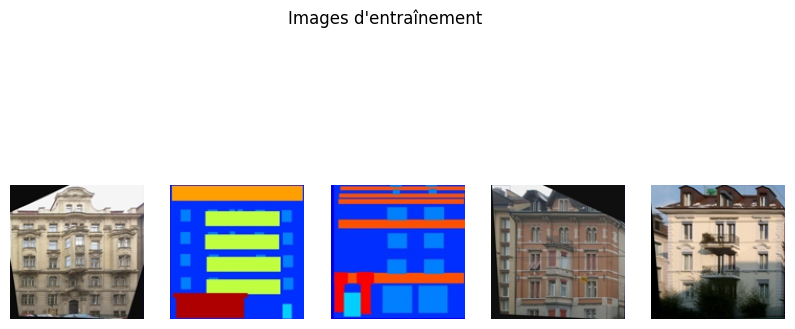

In [50]:
# Visualisation de quelques images
def visualize_images(images, title="Images"):
    plt.figure(figsize=(10, 5))
    for i, img in enumerate(images[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Visualiser les images d'entraînement
visualize_images(train_processed, title="Images d'entraînement")

In [52]:
# Pour garantir que tout fonctionne correctement
import tensorflow as tf
from tensorflow.keras import layers
print(f"Version de TensorFlow : {tf.__version__}")

Version de TensorFlow : 2.17.1


In [68]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

# Build a basic Pix2Pix model using U-Net architecture
def build_generator():
    inputs = layers.Input(shape=(128, 128, 3))  # Image size (128x128x3)

    # Encoder
    down_stack = [
        layers.Conv2D(64, (4,4), strides=2, padding='same', activation='relu'),
        layers.Conv2D(128, (4,4), strides=2, padding='same', activation='relu'),
        layers.Conv2D(256, (4,4), strides=2, padding='same', activation='relu'),
    ]

    # Decoder
    up_stack = [
        layers.Conv2DTranspose(128, (4,4), strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(64, (4,4), strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(3, (4,4), strides=2, padding='same', activation='sigmoid'),
    ]

    x = inputs
    for down in down_stack:
        x = down(x)

    for up in up_stack:
        x = up(x)

    return Model(inputs, x)

# Compile the generator model
generator = build_generator()
generator.compile(optimizer='adam', loss='mae')

# Assume train_processed is in (128, 128, 3)
train_images = np.array(train_processed)
train_images = train_images / 255.0  # Normalize

# Train the model (this is a simple setup, you should improve it)
generator.fit(train_images, train_images, epochs=5, batch_size=16)

print("Model training complete!")


Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - loss: 0.2281
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - loss: 0.1456
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 0.1069
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 0.0818
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - loss: 0.0753
Model training complete!


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


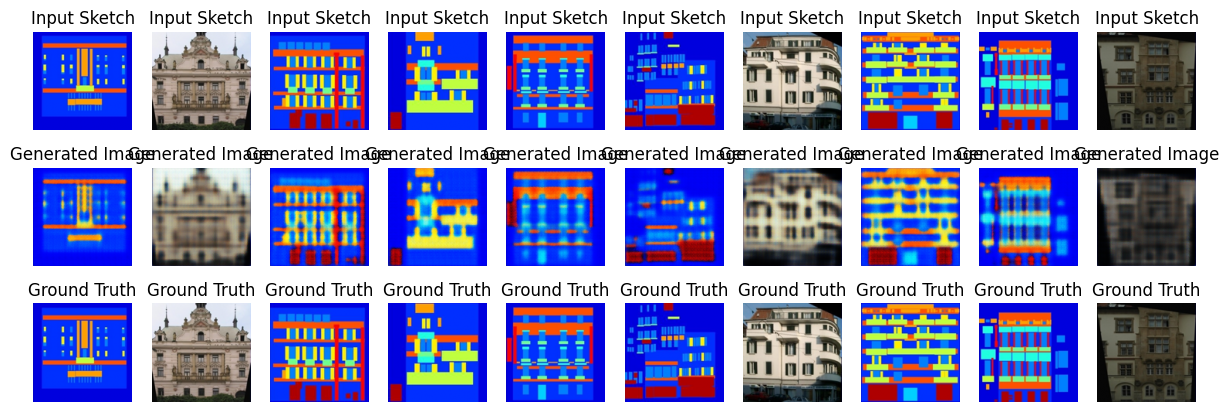

In [71]:
# Test the model with test images
test_images = np.array(test_processed) / 255.0  # Normalize
generated_images = generator.predict(test_images)

# Visualize the results
def compare_images(test_images, generated_images, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Display original sketch, generated image, and the ground truth
        plt.subplot(3, num_images, i + 1)
        plt.imshow(test_images[i])
        plt.title("Input Sketch")
        plt.axis('off')

        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(generated_images[i])
        plt.title("Generated Image")
        plt.axis('off')

        plt.subplot(3, num_images, 2*num_images + i + 1)
        plt.imshow(test_images[i])  # Use ground truth here
        plt.title("Ground Truth")
        plt.axis('off')

    plt.show()

compare_images(test_images, generated_images)


In [73]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

def evaluate_results(test_images, generated_images):
    ssim_scores = []
    for i in range(len(test_images)):
        # Specify data_range based on image normalization (0-1 range)
        score, _ = ssim(test_images[i], generated_images[i], full=True, multichannel=True, win_size=3, data_range=1.0)
        ssim_scores.append(score)
    print(f"Average SSIM score: {np.mean(ssim_scores):.4f}")

evaluate_results(test_images, generated_images)


Average SSIM score: 0.7624


**Résumé de l'analyse des résultats**
1. Réalisme des images générées :
Les images générées montrent une similarité modérée avec les images réelles, avec un score SSIM de 0.7624. Elles sont proches de la réalité mais pas parfaites, avec des imperfections visibles.

2. Erreurs et artefacts :
Couleurs incohérentes : Les couleurs peuvent être légèrement décalées.
Formes déformées : Certains objets peuvent être mal interprétés ou déformés.
Perte de détails fins : Les textures ou les ombres peuvent manquer de précision.
Incohérences lumineuses : Les effets de lumière peuvent ne pas être réalistes.
3. Améliorations proposées :
Augmentation des données : Diversifier les croquis avec des transformations (rotation, zoom, etc.) pour améliorer la robustesse.
Entraînement plus long : Augmenter le nombre d'époques pour permettre au modèle d'apprendre des détails plus fins.
Ajustement des hyperparamètres : Expérimenter avec le taux d'apprentissage et utiliser des architectures avancées comme Pix2Pix ou Cycle-GAN pour des résultats plus réalistes.
Amélioration de la structure du réseau : Ajouter des couches supplémentaires ou utiliser des techniques comme PatchGAN pour améliorer la précision.
**Conclusion :**
Le modèle génère déjà des images acceptables, mais un entraînement prolongé et l'ajustement des paramètres peuvent améliorer considérablement leur qualité.